## Statistical Description

In [1]:
#Importamos y guardamos el dataframe

import pandas as pd

RUTA_DATAFRAME = '/media/tr4shhh/Tr4Shhh_FOLDER/Proyects/4geeks/19-Naive_Bayes_Algorithm/naive-bayes-model/data/raw/playstore_reviews.csv'

df = pd.read_csv(RUTA_DATAFRAME, sep=',')

In [2]:
df

,package_name,review,polarity
0,com.facebook.katana,privacy at least put some option appear offli...,0
1,com.facebook.katana,"messenger issues ever since the last update, ...",0
2,com.facebook.katana,profile any time my wife or anybody has more ...,0
3,com.facebook.katana,the new features suck for those of us who don...,0
4,com.facebook.katana,forced reload on uploading pic on replying co...,0
...,...,...,...
886,com.rovio.angrybirds,loved it i loooooooooooooovvved it because it...,1
887,com.rovio.angrybirds,all time legendary game the birthday party le...,1
888,com.rovio.angrybirds,ads are way to heavy listen to the bad review...,0
889,com.rovio.angrybirds,fun works perfectly well. ads aren't as annoy...,1


### Null information

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   package_name  891 non-null    object
 1   review        891 non-null    object
 2   polarity      891 non-null    int64 
dtypes: int64(1), object(2)
memory usage: 21.0+ KB


### Statistical description

In [4]:
#descripcion estadistica
df.describe()

,polarity
count,891.000000
mean,0.344557
std,0.475490
min,0.000000
25%,0.000000
50%,0.000000
75%,1.000000
max,1.000000


In [5]:
#numero de filas y columnas
print(f'Filas: {df.shape[0]}, Columnas : {df.shape[1]}')

Filas: 891, Columnas : 3


In [6]:
#nombres columnas
print(df.columns)

Index(['package_name', 'review', 'polarity'], dtype='object')


In [7]:
#valores unicos en cada columna
print(df.nunique())


package_name     23
review          891
polarity          2
dtype: int64


In [8]:
#Valores unicos por columna

numero_minimo = 10

for columna in df.columns:
    # Verifica si la columna tiene menos de 10 valores únicos
    if df[columna].nunique() < numero_minimo:
        # Imprime los valores únicos de la columna 'neighbourhood_group'
        print(f"Valores únicos de {columna}: {df[columna].unique()}")

Valores únicos de polarity: [0 1]


### Surface Cleaning

In [9]:
#Copiamos el dataframe para no ser destructivos con los datos
clean_df = df.copy()

In [10]:
#Vemos las columnas que sobran
df.head()

,package_name,review,polarity
0,com.facebook.katana,privacy at least put some option appear offli...,0
1,com.facebook.katana,"messenger issues ever since the last update, ...",0
2,com.facebook.katana,profile any time my wife or anybody has more ...,0
3,com.facebook.katana,the new features suck for those of us who don...,0
4,com.facebook.katana,forced reload on uploading pic on replying co...,0


In [11]:
#Eliminamos las columnas que no nos daran valor al ML

eliminar =['package_name']

clean_df.drop(eliminar,axis=1,inplace=True)

## Univariate Description

### Categorical

In [12]:
#Nos quedamos solo con las variables categoricas 
categoricas = clean_df.select_dtypes(include='object')

In [13]:
categoricas

,review
0,privacy at least put some option appear offli...
1,"messenger issues ever since the last update, ..."
2,profile any time my wife or anybody has more ...
3,the new features suck for those of us who don...
4,forced reload on uploading pic on replying co...
...,...
886,loved it i loooooooooooooovvved it because it...
887,all time legendary game the birthday party le...
888,ads are way to heavy listen to the bad review...
889,fun works perfectly well. ads aren't as annoy...


### Numerical

In [15]:
#Nos quedamos solo con las variables numericas
numericas = clean_df.select_dtypes(include='number')

In [16]:
numericas

,polarity
0,0
1,0
2,0
3,0
4,0
...,...
886,1
887,1
888,0
889,1


In [17]:
numericas.describe()

,polarity
count,891.000000
mean,0.344557
std,0.475490
min,0.000000
25%,0.000000
50%,0.000000
75%,1.000000
max,1.000000


In [18]:
#valores unicos en cada columna
print(numericas.nunique())


polarity    2
dtype: int64


In [19]:
#Valores unicos por columna

numero_minimo = 10

for columna in numericas.columns:
    # Verifica si la columna tiene menos de 10 valores únicos
    if df[columna].nunique() < numero_minimo:
        # Imprime los valores únicos de la columna 'neighbourhood_group'
        print(f"Valores únicos de {columna}: {df[columna].unique()}")

Valores únicos de polarity: [0 1]


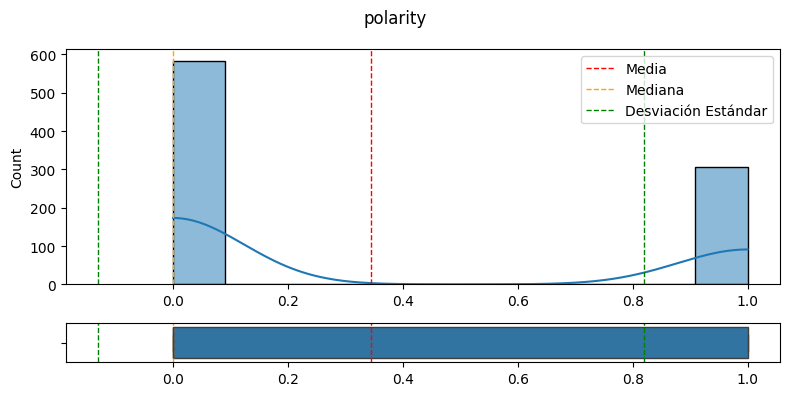

In [20]:
from utils import plot_numerical_data

plot_numerical_data(numericas)